 # Cryptanalysis of a general substitution cipher
 ***
A substitution cipher can be cracked if the encrypted message is sufficiently long and we have some understanding of the probability of appereance of each letter. The technique which cracks this cipher is called frequency analysis.

Imagine we have a message written in the alphabet and such that the typical frequency of appereances of each letter from is not equally likely. This happens often with natural languages. If we can gather a large sample of a given language (a book, etc.), the computation of frequences of letters in that language is the frequencies map.

Suppose we have a message for which an encryption with a certain substitution cipher was performed. The cryptogram contains letters from the same alphabet but their assignment is unknown.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import string
import common as cm

In [2]:
englishAlphabet = list(string.ascii_lowercase)

**We generate two permutations of English alphabet - one will encrypt the message *pb_key* and the other decrypt *pr_key*:**

In [3]:
pb_key, pr_key = cm.generateKeyPair(englishAlphabet)
print(pb_key)
print(pr_key)

[15, 1, 3, 8, 23, 25, 14, 13, 11, 24, 22, 9, 10, 21, 16, 0, 4, 12, 18, 5, 2, 6, 19, 7, 20, 17]
[15, 1, 20, 2, 16, 19, 21, 23, 3, 11, 12, 8, 17, 7, 6, 0, 14, 25, 18, 22, 24, 13, 10, 4, 9, 5]


In [4]:
message = cm.getLongMessage()
print(len(message))

26620


In [5]:
cipherText = cm.encryptMessage(message, pb_key, englishAlphabet)
plainText = cm.decryptMessage(cipherText, pr_key, englishAlphabet)
print(f'''Chiphertext: {cipherText[:500]} \n''')
print(f'''Plaintext: {plainText[:500]} \n''')

Chiphertext: ixpm mxpixm ps l slf iqtv fq tmlfx fnls jxffxm fq uqc l zxxj p klh qz xkqflqvs  xhdlfxkxvf paamxnxvslqv pvi p nlvf qz vxmgqcsvxss zqm uqc sxx fnls jxffxm dpmmlxs tlfn lf p sxdmxf sqkxfnlvo fnpf l npgx vxgxm snpmxi tlfn pvuqvx xjsx bxzqmx lf ls p sfqmu fnpf l npgx wxaf bcmlxi ixxa tlfnlv kx zqm zxpm qz tnpf qfnxms klonf fnlvw qm spu bcf fqipu l pk fpwlvo p jxpa qz zplfn pvi snpmlvo fnls sfqmu tlfn uqc fmcsflvo fnpf uqc tljj wxxa ku sxdmxf spzx pvi sqcvi lf ls p sfqmu fnpf oqxs bpdw kpvu uxpms fq  

Plaintext: dear reader as i sit down to write this letter to you i feel a mix of emotions  excitement apprehension and a hint of nervousness for you see this letter carries with it a secret something that i have never shared with anyone else before it is a story that i have kept buried deep within me for fear of what others might think or say but today i am taking a leap of faith and sharing this story with you trusting that you will keep my secret safe and sound it is a story th


### Here we build frequency tables for the plain text message, encrypted message (ciphertext) and a sample of natural langage (a book):
***

In [6]:
bookEnglish = open("./statics/PictureOfDorianGray.txt", "r", encoding='utf8')
counter = 0 
sampleNaturalLanguage = ""

for line in bookEnglish:
    sampleNaturalLanguage += cm.lclear(line.strip())
    counter += 1
    if counter > 5000: 
        break

In [7]:
frequencyTableNaturalLanguage = cm.getFrequencyTable(sampleNaturalLanguage, englishAlphabet)
frequencyTableChipher = cm.getFrequencyTable(cipherText, englishAlphabet)
frequencyTablePlaintext = cm.getFrequencyTable(plainText, englishAlphabet)

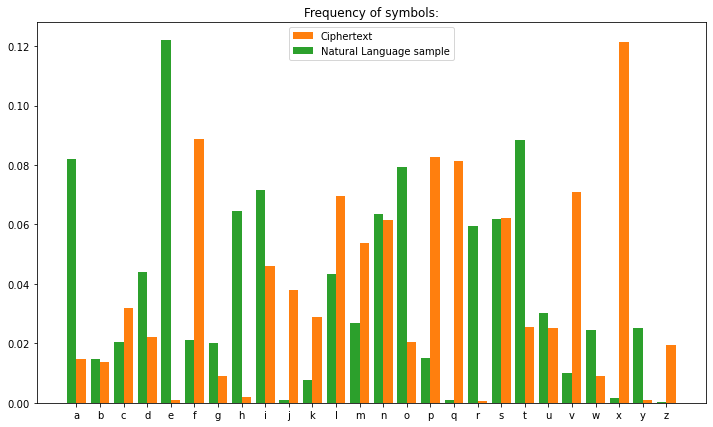

In [8]:
fig, ax = plt.subplots(figsize=(12,7))
x_axis = np.arange(len(englishAlphabet))

# ax.bar(x_axis-0.2, list(frequencyTablePlaintext.values()), label='Message', width=0.4)
ax.bar(x_axis+0.2, list(frequencyTableChipher.values()), label='Ciphertext', width=0.4, color="tab:orange")
ax.bar(x_axis-0.2, list(frequencyTableNaturalLanguage.values()), label='Natural Language sample', width=0.4, color="tab:green")

plt.xticks(x_axis, list(frequencyTableChipher.keys()))

plt.legend()
ax.set(title="Frequency of symbols:")
plt.show()

### What happens to be preserved is the frequence pattern:
**namely for the message of sufficient length the most frequent letter in the ciphertext is the most frequent letter in the message, etc. By matching the letters by frequences we can recover the original message without a key.**
***

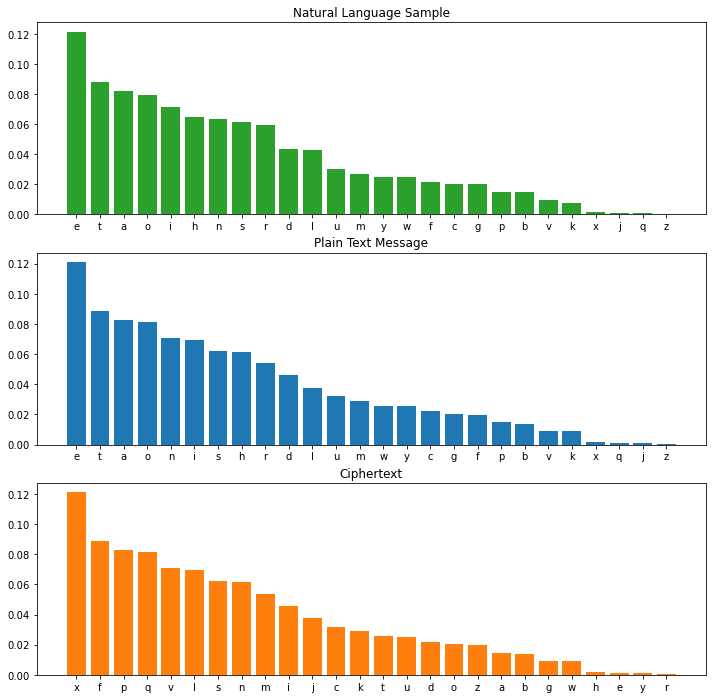

In [9]:
cipherTextFrequenciesSorted = list(frequencyTableChipher.items())
cipherTextFrequenciesSorted.sort(key = lambda x: x[1], reverse = True)
plainTextFrequenciesSorted = list(frequencyTablePlaintext.items())
plainTextFrequenciesSorted.sort(key = lambda x: x[1], reverse = True)
naturalLanguageFrequenciesSorted = list(frequencyTableNaturalLanguage.items())
naturalLanguageFrequenciesSorted.sort(key = lambda x: x[1], reverse = True)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))

ax1.bar(
    list(map(lambda x: x[0] ,naturalLanguageFrequenciesSorted)),
    list(map(lambda x: x[1] ,naturalLanguageFrequenciesSorted)),
    color="tab:green"
)
ax1.set(title="Natural Language Sample")
ax2.bar(
    list(map(lambda x: x[0] ,plainTextFrequenciesSorted)),
    list(map(lambda x: x[1] ,plainTextFrequenciesSorted))
)
ax2.set(title="Plain Text Message")
ax3.bar(
    list(map(lambda x: x[0] ,cipherTextFrequenciesSorted)),
    list(map(lambda x: x[1] ,cipherTextFrequenciesSorted)),
    color="tab:orange"
)
ax3.set(title="Ciphertext")
plt.show()

In [10]:
possibleDecryption = {}
for i in range(len(cipherTextFrequenciesSorted)):
    possibleDecryption[cipherTextFrequenciesSorted[i][0]] = naturalLanguageFrequenciesSorted[i][0]
possibleDecryption[" "] = " "
    
print(possibleDecryption)

{'x': 'e', 'f': 't', 'p': 'a', 'q': 'o', 'v': 'i', 'l': 'h', 's': 'n', 'n': 's', 'm': 'r', 'i': 'd', 'j': 'l', 'c': 'u', 'k': 'm', 't': 'y', 'u': 'w', 'd': 'f', 'o': 'c', 'z': 'g', 'a': 'p', 'b': 'b', 'g': 'v', 'w': 'k', 'h': 'x', 'e': 'j', 'y': 'q', 'r': 'z', ' ': ' '}


In [11]:
decryptionAttempt = ""
for ch in cipherText:
    decryptionAttempt= decryptionAttempt + possibleDecryption[ch]
    
print(f"Decrypted message : {decryptionAttempt[:500]}\n")
print(f"Original message : {plainText[:500]}")

Decrypted message : dear reader an h nht doyi to yrhte tshn letter to wou h geel a mhx og emothoin  exfhtemeit appreseinhoi aid a shit og iervounienn gor wou nee tshn letter farrhen yhts ht a nefret nometshic tsat h save iever nsared yhts aiwoie elne begore ht hn a ntorw tsat h save kept burhed deep yhtshi me gor gear og ysat otsern mhcst tshik or naw but todaw h am takhic a leap og gahts aid nsarhic tshn ntorw yhts wou trunthic tsat wou yhll keep mw nefret nage aid nouid ht hn a ntorw tsat coen bafk maiw wearn to 

Original message : dear reader as i sit down to write this letter to you i feel a mix of emotions  excitement apprehension and a hint of nervousness for you see this letter carries with it a secret something that i have never shared with anyone else before it is a story that i have kept buried deep within me for fear of what others might think or say but today i am taking a leap of faith and sharing this story with you trusting that you will keep my secret safe and sound it

### We can see resemblance of some words, but even the large ciphertext (<25000 symbols) doesn't allow us to perfectly restore the encryprion key.  
***
### Let's see what will happen with more historically probable (smaller-size) messages:

In [12]:
shortMessage = cm.getShortMessage()
print(len(shortMessage))
mediumMessage = cm.getMediumMessage()
print(len(mediumMessage))

150
2500


In [13]:
cipherTextShort = cm.encryptMessage(shortMessage, pb_key, englishAlphabet)
plainTextShort = cm.decryptMessage(cipherTextShort, pr_key, englishAlphabet)
cipherTextMedium = cm.encryptMessage(mediumMessage, pb_key, englishAlphabet)
plainTextMedium = cm.decryptMessage(cipherTextMedium, pr_key, englishAlphabet)

In [14]:
frequencyTableChipherShort = cm.getFrequencyTable(cipherTextShort, englishAlphabet)
frequencyTablePlaintextShort = cm.getFrequencyTable(plainTextShort, englishAlphabet)

cipherTextShortFrequenciesSorted = list(frequencyTableChipherShort.items())
cipherTextShortFrequenciesSorted.sort(key = lambda x: x[1], reverse = True)
plainTextShortFrequenciesSorted = list(frequencyTablePlaintextShort.items())
plainTextShortFrequenciesSorted.sort(key = lambda x: x[1], reverse = True)

frequencyTableChipherMedium = cm.getFrequencyTable(cipherTextMedium, englishAlphabet)
frequencyTablePlaintextMedium = cm.getFrequencyTable(plainTextMedium, englishAlphabet)

cipherTextMediumFrequenciesSorted = list(frequencyTableChipherMedium.items())
cipherTextMediumFrequenciesSorted.sort(key = lambda x: x[1], reverse = True)
plainTextMediumFrequenciesSorted = list(frequencyTablePlaintextMedium.items())
plainTextMediumFrequenciesSorted.sort(key = lambda x: x[1], reverse = True)

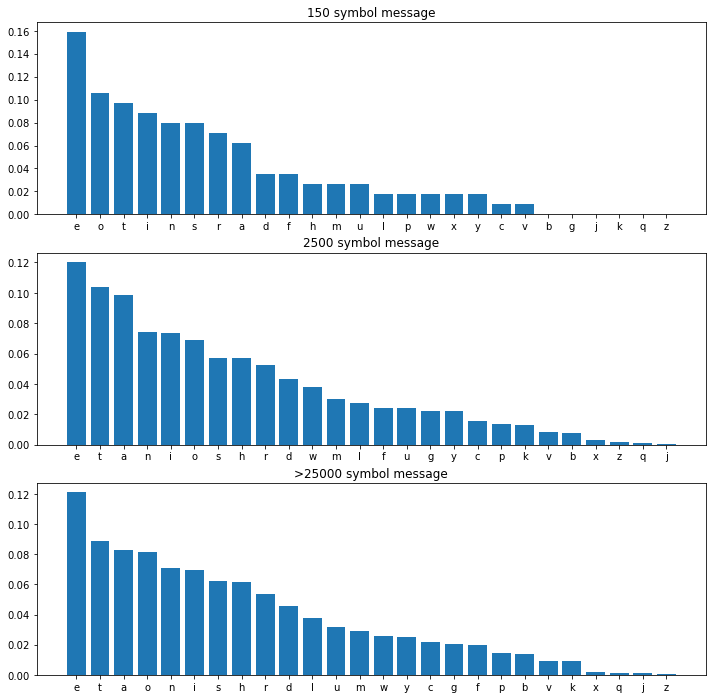

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))

ax1.bar(
    list(map(lambda x: x[0] ,plainTextShortFrequenciesSorted)),
    list(map(lambda x: x[1] ,plainTextShortFrequenciesSorted))
)
ax1.set(title="150 symbol message")
ax2.bar(
    list(map(lambda x: x[0] ,plainTextMediumFrequenciesSorted)),
    list(map(lambda x: x[1] ,plainTextMediumFrequenciesSorted))
)
ax2.set(title="2500 symbol message")
ax3.bar(
    list(map(lambda x: x[0] ,plainTextFrequenciesSorted)),
    list(map(lambda x: x[1] ,plainTextFrequenciesSorted))
)
ax3.set(title=">25000 symbol message")
plt.show()

### So, smaller texts symbols with similar frequencies of appearance can mix up, which will result in worse quality of frequency analisis decryption:

In [16]:
possibleDecryptionShortMessage = {}
for i in range(len(cipherTextShortFrequenciesSorted)):
    possibleDecryptionShortMessage[cipherTextShortFrequenciesSorted[i][0]] = naturalLanguageFrequenciesSorted[i][0]
possibleDecryptionShortMessage[" "] = " "

possibleDecryptionMediumMessage = {}
for i in range(len(cipherTextMediumFrequenciesSorted)):
    possibleDecryptionMediumMessage[cipherTextMediumFrequenciesSorted[i][0]] = naturalLanguageFrequenciesSorted[i][0]
possibleDecryptionMediumMessage[" "] = " "

In [17]:
decryptionAttemptShort = ""
for ch in cipherTextShort:
    decryptionAttemptShort= decryptionAttemptShort + possibleDecryptionShortMessage[ch]
    
print(f"Decrypted message : {decryptionAttemptShort}\n")
print(f"Original message : {cm.decryptMessage(cipherTextShort, pr_key, englishAlphabet)}")

Decrypted message : resn nesren si o ioa rtch at cnoae amoi feaaen at gtl o deef s uow td eutaothi  ewpoaeueha syynemehioth shr s moha td henbtliheii dtn gtl iee

Original message : dear reader as i sit down to write this letter to you i feel a mix of emotions  excitement apprehension and a hint of nervousness for you see


In [18]:
decryptionAttemptMeduim = ""
for ch in cipherTextMedium:
    decryptionAttemptMeduim = decryptionAttemptMeduim + possibleDecryptionMediumMessage[ch]
    
print(f"Decrypted message : {decryptionAttemptMeduim[:300]}\n")
print(f"Original message : {cm.decryptMessage(cipherTextMedium, pr_key, englishAlphabet)[:300]}")

Decrypted message : dear reader an i nit dhlo th lrite tsin metter th chy i weem a uix hw euhtihon  exgiteueot appreseoniho aod a siot hw oervhynoenn whr chy nee tsin metter garrien lits it a negret nhuetsiof tsat i save oever nsared lits aochoe emne kewhre it in a nthrc tsat i save bept kyried deep litsio ue whr wear 

Original message : dear reader as i sit down to write this letter to you i feel a mix of emotions  excitement apprehension and a hint of nervousness for you see this letter carries with it a secret something that i have never shared with anyone else before it is a story that i have kept buried deep within me for fear 


## Conclussion:
***
Frequency analisis usually cannot find 100% accurate key, since **even big size messages don't have ideal symbol frequency distribution**. The size of such a message must be **comparable with a book** and then the sample of Natural language must be also bigger (which I don't think is historically acurate and satisfies the problem).

**However**: This aproach can reduce the problem size of cracking the encryption key, so that you can use brute force to figure out which symbols are wrong and which symbols are right. This mixed technique of frequency-analisis/bruteforce can allow to crack monoalphabetic substitution ciphers really quickly.